In [23]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('moviereviews.csv')

In [25]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [26]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [27]:
df = df.dropna()

In [28]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [29]:
s = ""

In [30]:
df = df[~df['review'].str.isspace()]

In [31]:
df[df['review'].apply(lambda review: review=='')]

,label,review


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [33]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')

matrix = count_vect.fit_transform(df[df['label'] == 'neg']['review'])
freqs = zip(count_vect.get_feature_names(), matrix.sum(axis=0).to_list()[0])
print (sorted(freqs, key=lambda x: -x[1])[:20])

AttributeError: 'matrix' object has no attribute 'to_list'

In [35]:
X = df['review']

In [36]:
y = df['label']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [45]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [46]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [47]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [48]:
preds = pipe.predict(X_test)

In [49]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



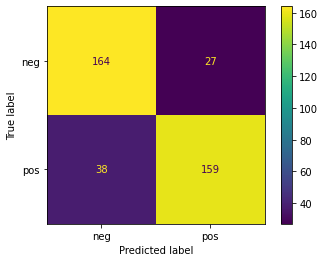

In [50]:
plot_confusion_matrix(pipe, X_test, y_test)